In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '../' # Expected to be in rank_scripts/

import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import os

In [3]:
caffe.set_device(0)
caffe.set_mode_gpu()
net = caffe.Net(caffe_root +  'rank_scripts/multi/deploy_multinet.prototxt',
                caffe_root + 'rank_scripts/models104/_iter_10000.caffemodel',
                caffe.TEST)# input preprocessing: 'data'is the name of the input blob == net.inputs[0]
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

In [4]:
# set net to batch size
net.blobs['data'].reshape(1,3,227,227)

[ -7.90073872 -10.12686729 -11.5169754  ...,  -8.42929745  -8.00561047
  -7.53425312]


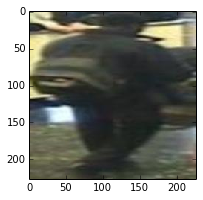

In [24]:
#query_image_path = '/home/jayant/caffe-Person-ReID_triplet/rank_scripts/images_market/0004_c1s6_016996_00.jpg'
query_image_path = '/home/jayant/vision/PETA/i-LID_alex/archive/0100_001.jpg'
query_image = caffe.io.load_image(query_image_path)
net.blobs['data'].data[...] = transformer.preprocess('data', query_image)
out = net.forward()
vector_query = out['fc7'][0]
plt.figure(figsize=(3,3))
plt.imshow(query_image)
print vector_query

In [6]:
print net.blobs['data'].data[...][0][2][222][127]

102.0


In [7]:
print net.blobs['fc6'].data[...][0]

[ -0.          32.42208099  -0.         ...,  20.70844078  -0.          -0.        ]


In [14]:
#for item in net.blobs['fc6'].data[...][0]:
    #print item,

In [8]:
print query_image[222][127][0]*255

102.00000152


In [25]:
#print net.blobs['conv3'].data[...][0]

In [12]:
#rint net.blobs['conv3'].data[...][0]

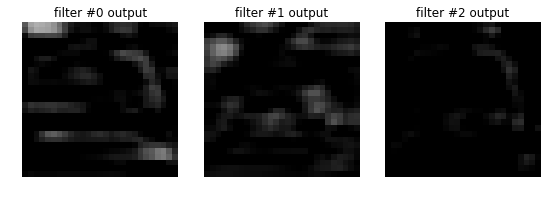

In [9]:
# helper show filter outputs
def show_filters(net):
    net.forward()
    plt.figure()
    filt_min, filt_max = net.blobs['conv2'].data.min(), net.blobs['conv2'].data.max()
    for i in range(3):
        plt.subplot(1,4,i+2)
        plt.title("filter #{} output".format(i))
        plt.imshow(net.blobs['conv2'].data[0, i], vmin=filt_min, vmax=filt_max)
        plt.tight_layout()
        plt.axis('off')

# filter the image with initial 
show_filters(net)

In [26]:
print out['fc8_a'][0]

[ -9.86082077  -4.40948486  -9.72986507  -5.79278851  -8.25123978
 -12.48869038   9.2329216    4.3997879  -14.73237038 -12.83524609
  -6.95529985 -10.94287586 -10.52014256 -13.22967052 -12.82715034
   3.90765262  -5.66237688  -7.49258184 -13.04870129  -6.83253479
 -13.16217041 -12.93012714 -15.03311062  -9.4350729   -9.14213562
  -4.15868092 -13.76943111 -13.16426182  -6.11240959 -12.71967602
 -12.31386948  11.08143139   4.41231728 -13.10427666  -7.25127411
  -9.58839607 -12.91386986 -16.67632103 -12.24797535  -9.10223484
 -12.56453419  -8.38637733 -10.14348984   4.20980024  -4.29652214
 -12.99299049  -9.11448956 -12.81713772  -9.71846771 -12.78978825
  -6.5048933   -5.35879755  10.26947594   5.30290413 -10.04741287
  -9.95825386 -10.59336853  -5.94062853   4.01573944  -5.61851406
  -8.76159191  -6.2602272  -10.75138378   6.0357151   -8.93241787
 -12.82993317  -6.98767185  -8.45086098  -6.67924929 -13.92857742
  -8.30794907 -13.01066399  -8.30864334  -6.17885637  -8.15721798
  -7.24400

In [27]:
learned_attribute = []
for item in out['fc8_a'][0]:
    if item > 0:
        learned_attribute.append(1)
    else:
        learned_attribute.append(0)
print learned_attribute
sum1=0
for item in learned_attribute:
    sum1=sum1+ int(item)
print 'sum =',sum1
i=1
for item in learned_attribute:
    if item ==1 :
        print i
    i=i+1


[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
sum = 16
7
8
16
32
33
44
53
54
59
64
77
81
90
95
96
104
